In [121]:
#Inside the main dir create the 
#pyclassapp.py 
#.flaskenv and 
#config.py files below:

In [122]:
%%writefile .flaskenv
FLASK_APP=pyclassapp.py

Overwriting .flaskenv


In [123]:
%%writefile pyclassapp.py
from app import app

Overwriting pyclassapp.py


In [124]:
%%writefile config.py
import os

class Config(object):
    SECRET_KEY = os.environ.get('SECRET_KEY') or 'you-will-never-guess'

Overwriting config.py


In [125]:
#Then create a new folder subdirectory called app
#Then inside app create the __init__.py and routes.py files below:

In [126]:
%%writefile app/__init__.py
from flask import Flask
from config import Config

app = Flask(__name__)
app.config.from_object(Config)

from app import routes

Overwriting app/__init__.py


In [127]:
%%writefile app/routes.py
from flask import render_template
from app import app

import io
import random
import pandas as pd
from flask import Response
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from matplotlib.figure import Figure

def create_figure():
    fig = Figure()
    axis = fig.add_subplot(1, 1, 1)
    xs = range(100)
    ys = [random.randint(1, 50) for x in xs]
    axis.plot(xs, ys)
    return fig


@app.route('/')
@app.route('/index')
def index():
    user = {'username': 'Martin'}
    posts = [
        {
            'author': {'username': 'Carlos'},
            'body': 'This site looks.."great"!'
        },
        {
            'author': {'username': 'Brenna'},
            'body': 'Where are the Moops?!'
        }
    ]
    return render_template('index.html', title='Home', user=user, posts=posts)
@app.route('/historic')
def historic():
    fig = create_figure()
    output = io.BytesIO()
    FigureCanvas(fig).print_png(output)
    return Response(output.getvalue(), mimetype='image/png')

Overwriting app/routes.py


In [128]:
#Then create a new folder subdirectory in app called templates

In [129]:
#The following is the base template as well as other pages

In [130]:
%%writefile app/templates/base.html
<html>
    <head>
        {% if title %}
        <title>{{ title }} - PyClassApp</title>
        {% else %}
        <title>Welcome to PyClassApp</title>
        {% endif %}
    </head>
    <body>
        <div>
            PyClassApp: 
            <a href="/index">Home</a>
            <a href="/historic">Historic</a>
        </div>
        <h1>
        {% block content %}{% endblock %}
    </body>
</html>

Writing app/templates/base.html


In [131]:
%%writefile app/templates/index.html
{% extends "base.html" %}

{% block content %}
    <h1>Hi, {{ user.username }}!</h1>
    <br></br>
    <div><p>---Page Comments---</p></div>
    {% for post in posts %}
    <div><p>{{ post.author.username }} says: <b>{{ post.body }}</b></p></div>
    {% endfor %}
{% endblock %}

Writing app/templates/index.html


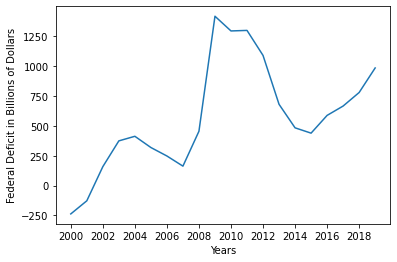

In [132]:
import pandas as pd

deficit_data = pd.read_csv("https://datalab.usaspending.gov/americas-finance-guide/afgData/federal_deficit_trends.csv")

column_list = ["year", "federal_deficit"]
deficit_data[list(column_list)]

deficit_data['federal_deficit_in_billions'] = deficit_data['federal_deficit'] / -1_000_000_000
ax = deficit_data.plot(x="year", y="federal_deficit_in_billions", legend=False)
ax.set_ylabel("Federal Deficit in Billions of Dollars")
ax.set_xlabel("Years")
ax.set_xticks(deficit_data["year"].unique()[::2]);